<h1><center>Customer Data Exploration</center></h1>

## 1. Load Data

### 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(8675309)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import f1_score, confusion_matrix, classification_report, silhouette_score

sns.set(style='ticks',palette='pastel',font_scale=1.3)

### 1.2 Data

<b>Data Dictionary</b>
<ul>
    <li>"index": the unique ID to identify each row starting with 0</li>
    <li>"response": 1 for question not answered and 0 for question answered</li>
    <li>"IL1": CSA (customer service agent) identified issue level 1</li>
    <li>"IL2": CSA identified issue level 2</li>
    <li>"IL3": CSA identified issue level 3</li>
    <li>"IL4": CSA identified issue level 4</li>
<li>"CIL1": customer identified issue level 1</li>
<li>"CIL2": customer identified issue level 2</li>
<li>"CIL3": customer identified issue level 3</li>
<li>"CLI4": customer identified issue level 4</li>
<li>"prime": 1 for prime customer, 0 for not prime customer</li>
<li>"score1": a score related to customer's technical savviness level (higher is more savvy)</li>
<li>"score2": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score3": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score4": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score5": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"contact_type": a variable related to masked contact type</li>
<li>"day": day of the week with Monday=0 and Sunday=6</li>
<li>"hour": hour of the day in 24 hour format</li>
<li>"device": a masked device code name Metrics</li>
</ul>

In [2]:
df_train = pd.read_csv('Training.csv', na_values='null')
df_train.head()

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,NaN,NaN,NaN,NaN,0,0.05,NaN,NaN,NaN,NaN,NaN,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,NaN,NaN,NaN,NaN,NaN,0,0.10,NaN,NaN,NaN,NaN,NaN,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,NaN,NaN,NaN,NaN,1,2.00,NaN,NaN,NaN,NaN,NaN,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.00,NaN,NaN,NaN,NaN,NaN,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,NaN,NaN,NaN,NaN,0,1.25,NaN,NaN,NaN,NaN,NaN,5,7,D-6


In [3]:
print(df_train.info())
df_train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6815 non-null   int64  
 1   response      6815 non-null   int64  
 2   IL1           6810 non-null   object 
 3   IL2           6728 non-null   object 
 4   IL3           6706 non-null   object 
 5   IL4           6289 non-null   object 
 6   CIL1          1670 non-null   object 
 7   CIL2          1646 non-null   object 
 8   CIL3          1506 non-null   object 
 9   CLI4          323 non-null    object 
 10  prime         6815 non-null   int64  
 11  score1        5946 non-null   float64
 12  score2        2566 non-null   float64
 13  score3        2566 non-null   float64
 14  score4        2566 non-null   float64
 15  score5        2566 non-null   float64
 16  contact_type  2566 non-null   float64
 17  day           6815 non-null   int64  
 18  hour          6815 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,6815,NaN,NaN,NaN,6907.2,4016.89,1,3423.5,6891,10372.5,13911
response,6815,NaN,NaN,NaN,0.0856933,0.279931,0,0,0,0,1
IL1,6810,50,Content,2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL2,6728,192,Basic Info / How-To,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL3,6706,490,Accidental Order,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL4,6289,511,Refunded,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL1,1670,14,Amazon Devices And Kindle Apps,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL2,1646,53,Amazon Devices,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL3,1506,121,Something else,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLI4,323,32,Something else,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df_train.columns:
    print('Column {} has {} null values'.format(col, df_train[col].isnull().sum()))

Column ID has 0 null values
Column response has 0 null values
Column IL1 has 5 null values
Column IL2 has 87 null values
Column IL3 has 109 null values
Column IL4 has 526 null values
Column CIL1 has 5145 null values
Column CIL2 has 5169 null values
Column CIL3 has 5309 null values
Column CLI4 has 6492 null values
Column prime has 0 null values
Column score1 has 869 null values
Column score2 has 4249 null values
Column score3 has 4249 null values
Column score4 has 4249 null values
Column score5 has 4249 null values
Column contact_type has 4249 null values
Column day has 0 null values
Column hour has 0 null values
Column device has 0 null values


In [5]:
num_cols = ['score'+str(i) for i in range(1, 6)] + ['day', 'hour']
cat_cols_part = ['response', 'prime', 'contact_type']
cat_cols = ['device'] + cat_cols_part + ['IL'+str(i) for i in range(1, 5)] + ['CIL'+str(i) for i in range(1, 3)] + ['CLI4']

In [6]:
df_test = pd.read_csv('Test.csv')
df_test.head()

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,NaN,1,0.0,0.167584,25.0,0.0,100.0,4.0,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,1.5,NaN,NaN,NaN,NaN,NaN,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.1,NaN,NaN,NaN,NaN,NaN,3,9,D-27


In [7]:
print(df_test.info())
df_test.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2923 non-null   int64  
 1   IL1           2922 non-null   object 
 2   IL2           2900 non-null   object 
 3   IL3           2890 non-null   object 
 4   IL4           2699 non-null   object 
 5   CIL1          713 non-null    object 
 6   CIL2          706 non-null    object 
 7   CIL3          644 non-null    object 
 8   CLI4          147 non-null    object 
 9   prime         2923 non-null   int64  
 10  score1        2534 non-null   float64
 11  score2        1110 non-null   float64
 12  score3        1110 non-null   float64
 13  score4        1110 non-null   float64
 14  score5        1110 non-null   float64
 15  contact_type  1110 non-null   float64
 16  day           2923 non-null   int64  
 17  hour          2923 non-null   int64  
 18  device        2923 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2923,NaN,NaN,NaN,7086.56,4013.16,0,3657,7196,10541.5,13908
IL1,2922,37,Content,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL2,2900,147,Basic Info / How-To,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL3,2890,331,Payment / Subscription Issues,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL4,2699,356,Refunded,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL1,713,12,Amazon Devices And Kindle Apps,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL2,706,40,Kindle eBooks,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL3,644,65,Something else,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLI4,147,17,Something else,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prime,2923,NaN,NaN,NaN,0.550462,0.497532,0,0,1,1,1


## Q1
Fill the scores with mean values.

In [8]:
df_train_ = df_train.fillna(df_train[['score1', 'score2', 'score3', 'score4', 'score5']].mean())
print(df_train_.describe())
df_train_.head()

                 ID     response        prime       score1       score2  \
count   6815.000000  6815.000000  6815.000000  6815.000000  6815.000000   
mean    6907.202494     0.085693     0.570653     0.459628     0.272083   
std     4016.891191     0.279931     0.495019     0.646037     0.079461   
min        1.000000     0.000000     0.000000     0.000000     0.127339   
25%     3423.500000     0.000000     0.000000     0.000000     0.272083   
50%     6891.000000     0.000000     1.000000     0.150000     0.272083   
75%    10372.500000     0.000000     1.000000     0.500000     0.272083   
max    13911.000000     1.000000     1.000000     2.000000     0.670799   

            score3       score4       score5  contact_type          day  \
count  6815.000000  6815.000000  6815.000000   2566.000000  6815.000000   
mean     29.264641    18.224330     5.465931      0.515978     2.719736   
std      21.605673    19.816459    12.879033      1.341037     1.940133   
min       0.000000     0

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,NaN,NaN,NaN,NaN,0,0.05,0.272083,29.264641,18.22433,5.465931,NaN,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,NaN,NaN,NaN,NaN,NaN,0,0.10,0.272083,29.264641,18.22433,5.465931,NaN,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,NaN,NaN,NaN,NaN,1,2.00,0.272083,29.264641,18.22433,5.465931,NaN,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.00,0.272083,29.264641,18.22433,5.465931,NaN,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,NaN,NaN,NaN,NaN,0,1.25,0.272083,29.264641,18.22433,5.465931,NaN,5,7,D-6


In [9]:
df_test_ = df_test.fillna(df_train[['score1', 'score2', 'score3', 'score4', 'score5']].mean())
print(df_test_.describe())
df_test_.head()

                 ID        prime       score1       score2       score3  \
count   2923.000000  2923.000000  2923.000000  2923.000000  2923.000000   
mean    7086.564489     0.550462     0.436425     0.269930    28.795366   
std     4013.161307     0.497532     0.622966     0.076014    21.597488   
min        0.000000     0.000000     0.000000     0.127339     0.000000   
25%     3657.000000     0.000000     0.000000     0.272083    29.264641   
50%     7196.000000     1.000000     0.100000     0.272083    29.264641   
75%    10541.500000     1.000000     0.459628     0.272083    29.264641   
max    13908.000000     1.000000     2.000000     0.630554   100.000000   

            score4       score5  contact_type          day         hour  
count  2923.000000  2923.000000   1110.000000  2923.000000  2923.000000  
mean     17.972774     5.065995      0.446847     2.714335    12.047896  
std      19.453034    11.795049      1.260614     1.926656     4.319278  
min       0.000000    -1.000

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,0.000000,0.272083,29.264641,18.22433,5.465931,NaN,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,NaN,1,0.000000,0.167584,25.000000,0.00000,100.000000,4.0,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,1,1.500000,0.272083,29.264641,18.22433,5.465931,NaN,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,NaN,NaN,NaN,NaN,0,0.459628,0.272083,29.264641,18.22433,5.465931,NaN,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,NaN,NaN,NaN,NaN,0,0.100000,0.272083,29.264641,18.22433,5.465931,NaN,3,9,D-27


Filling data can only come from training. Filling data from testing set will cause information leakage - no one knows the what the the testing data will be like when training the model.<br>
Moreover, consider a continuously growing dataset. If filling the null values with average of the whole dataset, this value needs to change as soon as new data is added, which isn't practical.

## Q2
It does not make sense to impute variables for columns like IL_ and CIL_ because:<br>
These are not numerical columns and no "mean" or "median" can be calculated.<br>
It does not make sense to assign an arbitrary issue level to an entry.

In [10]:
issue_cols = ['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4', 'device']
df_train_[issue_cols] = df_train_[issue_cols].fillna(value='Not Specified')
df_train_.head()

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,Not Specified,Not Specified,Not Specified,Not Specified,0,0.05,0.272083,29.264641,18.22433,5.465931,NaN,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.10,0.272083,29.264641,18.22433,5.465931,NaN,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,Not Specified,Not Specified,Not Specified,Not Specified,1,2.00,0.272083,29.264641,18.22433,5.465931,NaN,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.00,0.272083,29.264641,18.22433,5.465931,NaN,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,Not Specified,Not Specified,Not Specified,Not Specified,0,1.25,0.272083,29.264641,18.22433,5.465931,NaN,5,7,D-6


In [11]:
df_test_[issue_cols] = df_test_[issue_cols].fillna(value='Not Specified')
df_test_.head()

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,0.000000,0.272083,29.264641,18.22433,5.465931,NaN,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,Not Specified,1,0.000000,0.167584,25.000000,0.00000,100.000000,4.0,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,1.500000,0.272083,29.264641,18.22433,5.465931,NaN,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.459628,0.272083,29.264641,18.22433,5.465931,NaN,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.100000,0.272083,29.264641,18.22433,5.465931,NaN,3,9,D-27


Contact_type is a categorical variable. Therefore, instead of filling the null values with mean, "Not Specified" should be filled.

In [12]:
df_train_['contact_type'] = df_train_['contact_type'].fillna(value='Not Specified')
df_train_.head()

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,Not Specified,Not Specified,Not Specified,Not Specified,0,0.05,0.272083,29.264641,18.22433,5.465931,Not Specified,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.10,0.272083,29.264641,18.22433,5.465931,Not Specified,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,Not Specified,Not Specified,Not Specified,Not Specified,1,2.00,0.272083,29.264641,18.22433,5.465931,Not Specified,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.00,0.272083,29.264641,18.22433,5.465931,Not Specified,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,Not Specified,Not Specified,Not Specified,Not Specified,0,1.25,0.272083,29.264641,18.22433,5.465931,Not Specified,5,7,D-6


In [13]:
df_test_['contact_type'] = df_test_['contact_type'].fillna(value='Not Specified')
df_test_.head()

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,0.000000,0.272083,29.264641,18.22433,5.465931,Not Specified,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,Not Specified,1,0.000000,0.167584,25.000000,0.00000,100.000000,4,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,1.500000,0.272083,29.264641,18.22433,5.465931,Not Specified,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.459628,0.272083,29.264641,18.22433,5.465931,Not Specified,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.100000,0.272083,29.264641,18.22433,5.465931,Not Specified,3,9,D-27


Check if all columns are filled.

In [14]:
df_train_.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6815.0,6907.202494,4016.891191,1.000000,3423.500000,6891.000000,10372.500000,13911.000000
response,6815.0,0.085693,0.279931,0.000000,0.000000,0.000000,0.000000,1.000000
prime,6815.0,0.570653,0.495019,0.000000,0.000000,1.000000,1.000000,1.000000
score1,6815.0,0.459628,0.646037,0.000000,0.000000,0.150000,0.500000,2.000000
score2,6815.0,0.272083,0.079461,0.127339,0.272083,0.272083,0.272083,0.670799
score3,6815.0,29.264641,21.605673,0.000000,29.264641,29.264641,29.264641,100.000000
score4,6815.0,18.224330,19.816459,0.000000,0.000000,18.224330,18.224330,100.000000
score5,6815.0,5.465931,12.879033,-1.000000,0.000000,5.465931,5.465931,100.000000
day,6815.0,2.719736,1.940133,0.000000,1.000000,3.000000,4.000000,6.000000
hour,6815.0,12.118855,4.325875,0.000000,9.000000,12.000000,15.000000,23.000000


In [15]:
df_test_.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2923.0,7086.564489,4013.161307,0.000000,3657.000000,7196.000000,10541.500000,13908.000000
prime,2923.0,0.550462,0.497532,0.000000,0.000000,1.000000,1.000000,1.000000
score1,2923.0,0.436425,0.622966,0.000000,0.000000,0.100000,0.459628,2.000000
score2,2923.0,0.269930,0.076014,0.127339,0.272083,0.272083,0.272083,0.630554
score3,2923.0,28.795366,21.597488,0.000000,29.264641,29.264641,29.264641,100.000000
score4,2923.0,17.972774,19.453034,0.000000,0.000000,18.224330,18.224330,100.000000
score5,2923.0,5.065995,11.795049,-1.000000,0.000000,5.465931,5.465931,100.000000
day,2923.0,2.714335,1.926656,0.000000,1.000000,3.000000,4.000000,6.000000
hour,2923.0,12.047896,4.319278,0.000000,9.000000,12.000000,15.000000,23.000000


In [ ]:
df_train_.to_csv('train_filled.csv', index=0)
df_test_.to_csv('test_filled.csv', index=0)

## Q3

In [16]:
for col in (issue_cols + ['contact_type']):
    unique_vals = pd.concat([df_train_[col],df_test_[col]]).unique()
    df_train_[col] = df_train_[col].astype('category').cat.set_categories(unique_vals)
    df_test_[col] = df_test_[col].astype('category').cat.set_categories(unique_vals)
    print(col)

IL1
IL2
IL3
IL4
CIL1
CIL2
CIL3
CLI4
device
contact_type


In [18]:
df_train_.describe(include='all')

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
count,6815.000000,6815.000000,6815,6815,6815,6815,6815,6815,6815,6815,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815,6815.000000,6815.000000,6815
unique,NaN,NaN,51,193,491,512,15,54,122,33,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,68
top,NaN,NaN,Content,Basic Info / How-To,Accidental Order,Refunded,Not Specified,Not Specified,Not Specified,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,D-70
freq,NaN,NaN,2534,692,607,615,5145,5169,5309,6492,NaN,NaN,NaN,NaN,NaN,NaN,4249,NaN,NaN,1536
mean,6907.202494,0.085693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.570653,0.459628,0.272083,29.264641,18.224330,5.465931,NaN,2.719736,12.118855,NaN
std,4016.891191,0.279931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495019,0.646037,0.079461,21.605673,19.816459,12.879033,NaN,1.940133,4.325875,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.127339,0.000000,0.000000,-1.000000,NaN,0.000000,0.000000,NaN
25%,3423.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.272083,29.264641,0.000000,0.000000,NaN,1.000000,9.000000,NaN
50%,6891.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.150000,0.272083,29.264641,18.224330,5.465931,NaN,3.000000,12.000000,NaN
75%,10372.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.500000,0.272083,29.264641,18.224330,5.465931,NaN,4.000000,15.000000,NaN


In [22]:
df_train_oh = pd.get_dummies(df_train_)
df_test_oh = pd.get_dummies(df_test_)

```Python
oh_enc = OneHotEncoder(categories = categories, drop='first')
oh_enc.fit(pd.concat([df_train_[issue_cols], df_test_[issue_cols]]).values)

all_col_names = []
for col_name, col_cat in zip(issue_cols, oh_enc.categories_):
    all_col_names += [col_name + ' ' + name for name in col_cat]

all_col_names

df_train_oh_ = oh_enc.fit_transform(df_train_[issue_cols].values).toarray()
df_train_oh_ = pd.DataFrame(df_train_oh_)
df_train_oh = pd.concat([df_train_[[col for col in df_train_.columns if col not in issue_cols]],
                         df_train_oh_],
                         axis=1)

df_test_oh_ = oh_enc.fit_transform(df_test_[issue_cols].values).toarray()
df_test_oh_ = pd.DataFrame(df_test_oh_)
df_test_oh = pd.concat([df_test_[[col for col in df_test_.columns if col not in issue_cols]],
                        df_test_oh_],
                        axis=1)
```

In [20]:
df_train_oh.head()

,ID,response,prime,score1,score2,score3,score4,score5,day,hour,...,device_D-58,device_D-36,device_D-26,device_D-61,device_D-69,device_D-21,device_D-60,device_D-2,device_D-30,device_D-18
0,4569,1,0,0.05,0.272083,29.264641,18.22433,5.465931,3,8,...,0,0,0,0,0,0,0,0,0,0
1,4402,0,0,0.10,0.272083,29.264641,18.22433,5.465931,3,4,...,0,0,0,0,0,0,0,0,0,0
2,9533,0,1,2.00,0.272083,29.264641,18.22433,5.465931,0,15,...,0,0,0,0,0,0,0,0,0,0
3,9981,0,0,0.00,0.272083,29.264641,18.22433,5.465931,1,8,...,0,0,0,0,0,0,0,0,0,0
4,1849,0,0,1.25,0.272083,29.264641,18.22433,5.465931,5,7,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_test_oh.head()

,ID,prime,score1,score2,score3,score4,score5,day,hour,IL1_Account Assistance / Mycd Settings,...,device_D-58,device_D-36,device_D-26,device_D-61,device_D-69,device_D-21,device_D-60,device_D-2,device_D-30,device_D-18
0,3359,1,0.000000,0.272083,29.264641,18.22433,5.465931,6,15,0,...,0,0,0,0,0,0,0,0,0,0
1,13318,1,0.000000,0.167584,25.000000,0.00000,100.000000,6,11,0,...,0,0,0,0,0,0,0,0,0,0
2,5956,1,1.500000,0.272083,29.264641,18.22433,5.465931,3,8,0,...,0,0,0,0,0,0,0,0,0,0
3,11408,0,0.459628,0.272083,29.264641,18.22433,5.465931,6,7,0,...,0,0,0,0,0,0,0,0,0,0
4,11577,0,0.100000,0.272083,29.264641,18.22433,5.465931,3,9,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_oh.to_csv('train_oh.csv', index=0)
df_test_oh.to_csv('test_oh.csv', index=0)

## Q4

In [24]:
scaler = StandardScaler()

In [34]:
train_cols = df_train_oh.drop(labels=['ID', 'response'], axis=1).columns

In [35]:
scaler.fit(df_train_oh[train_cols])

StandardScaler()

In [36]:
df_train_oh_norm = scaler.transform(df_train_oh[train_cols])

In [37]:
df_train_oh_norm = pd.DataFrame(df_train_oh_norm, columns=train_cols)
df_train_oh_norm.head()

,prime,score1,score2,score3,score4,score5,day,hour,IL1_Account Assistance / Mycd Settings,IL1_Freetime,...,device_D-58,device_D-36,device_D-26,device_D-61,device_D-69,device_D-21,device_D-60,device_D-2,device_D-30,device_D-18
0,-1.152874,-0.634110,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,0.144467,-0.952214,3.183649,-0.123878,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
1,-1.152874,-0.556709,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,0.144467,-1.876950,-0.314105,8.072487,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
2,0.867398,2.384514,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-1.401932,0.666075,-0.314105,-0.123878,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
3,-1.152874,-0.711510,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.886466,-0.952214,-0.314105,-0.123878,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
4,-1.152874,1.223505,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,1.175399,-1.183398,-0.314105,-0.123878,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114


In [66]:
i = 5
1e-5

1e-05

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_train_oh_norm,
                                                    df_train_oh['response'],
                                                    test_size=0.3, random_state=0)

params = {
#           'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:7},
                          {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:30}, {0:1, 1:50}],
          'C':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
#           'tol':[1e-3, 1e-4, 1e-5],
#           'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
#           'max_iter':list(range(300, 500, 50)),
#           'multi_class':['auto','ovr','multinomial']
         }

rand_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=0, max_iter=500),
    param_distributions=params,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [68]:
rand_result.best_params_

{'class_weight': 'balanced', 'C': 1e-05}

In [75]:
lr = LogisticRegression(random_state=0, max_iter=500, **rand_result.best_params_)

In [76]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print('The precision is {}'.format(round(lr.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
display(pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered']))
# cv_scores = cross_val_score(lr, df_train_oh_norm, df_train_oh['response'], cv=10)
# print('Mean score is {}'.format(np.mean(cv_scores)))
# print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.826
The f1 score is 0.195
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1870
           1       0.16      0.25      0.19       175

    accuracy                           0.83      2045
   macro avg       0.54      0.56      0.55      2045
weighted avg       0.86      0.83      0.84      2045



,Not Answered,Answered
Not Answered,43,132
Answered,224,1646


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_train_oh_norm,
                                                    df_train_oh['response'],
                                                    test_size=0.3, random_state=0)

params = {
#           'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:7},
                          {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:30}, {0:1, 1:50}],
          'C':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
#           'tol':[1e-3, 1e-4, 1e-5],
#           'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
#           'max_iter':list(range(300, 500, 50)),
#           'multi_class':['auto','ovr','multinomial']
         }

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=0, max_iter=500),
    param_grid=params,
    cv = 5,
    scoring='f1',
    n_jobs = -1
)

grid_result = grid_search.fit(X_train, y_train)

In [74]:
grid_result.best_params_

{'C': 1e-05, 'class_weight': 'balanced'}

In [79]:
lr_ = LogisticRegression(random_state=0, **grid_result.best_params_)
lr_.fit(X_train, y_train)
y_predict_ = lr_.predict(X_test)
print('The precision is {}'.format(round(lr_.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict_),3)))
print(classification_report(y_test,y_predict_))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_).ravel()
display(pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered']))
cv_scores = cross_val_score(lr_, df_train_oh_norm, df_train_oh['response'], cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.826
The f1 score is 0.195
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1870
           1       0.16      0.25      0.19       175

    accuracy                           0.83      2045
   macro avg       0.54      0.56      0.55      2045
weighted avg       0.86      0.83      0.84      2045



,Not Answered,Answered
Not Answered,43,132
Answered,224,1646


Mean score is 0.821571692482592
Score STD is 0.009923241112336192


## Q5

Trying decision tree

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_train_oh[df_test_oh.columns],
                                                    df_train_oh['response'],
                                                    test_size=0.3, random_state=0)

params = {
          'criterion':['gini','entropy'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'max_features':list(range(1,20)),
          'max_depth':list(range(3,16)),
          'min_samples_leaf':list(range(1,16)),
          'min_samples_split':list(range(1,16))
         }

rand_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_distributions=params,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [72]:
rand_result.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 4,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [73]:
dtc = DecisionTreeClassifier(random_state=0, **rand_result.best_params_)

In [74]:
dtc = dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_test)
print('The precision is {}'.format(round(dtc.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered'])
cv_scores = cross_val_score(dtc, pd.DataFrame(df_train_oh_norm), df_train_oh['response'], cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.9
The f1 score is 0.038
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1870
           1       0.11      0.02      0.04       175

    accuracy                           0.90      2045
   macro avg       0.51      0.50      0.49      2045
weighted avg       0.85      0.90      0.87      2045

Mean score is 0.3364344740570405
Score STD is 0.3675770691817951


The decision tree is overfitting.

In [75]:
df_train_oh_norm

,ID,prime,score1,score2,score3,score4,score5,contact_type,day,hour,...,device D-58,device D-36,device D-26,device D-61,device D-69,device D-21,device D-60,device D-2,device D-30,device D-18
0,-0.582135,-1.152874,-6.341097e-01,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,0.144467,-0.952214,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
1,-0.623713,-1.152874,-5.567091e-01,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,0.144467,-1.876950,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
2,0.653737,0.867398,2.384514e+00,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,-1.401932,0.666075,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
3,0.765274,-1.152874,-7.115103e-01,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,-0.886466,-0.952214,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
4,-1.259326,-1.152874,1.223505e+00,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,1.175399,-1.183398,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,-0.810936,0.867398,-7.115103e-01,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,-0.371000,-0.489846,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
6811,1.026192,-1.152874,-7.115103e-01,4.399353e+00,2.116977e+00,-4.993352e-01,3.026386e+00,0.389158,-0.371000,-0.258662,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
6812,1.018225,-1.152874,-4.812189e-15,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,-0.886466,-0.721030,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114
6813,0.218294,0.867398,-7.115103e-01,2.375412e-14,3.124481e-15,1.434353e-15,-1.379364e-16,-0.517547,0.659933,-0.952214,...,-0.012114,-0.024234,-0.024234,-0.012114,-0.024234,-0.029685,-0.020986,-0.012114,-0.017133,-0.012114


In [181]:
kmeans_inertia = []
r = range(20, 31)
for i in r:
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_train_oh_norm)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(r, kmeans_inertia, marker='o', linestyle='--')

ValueError: could not convert string to float: 'D-17'

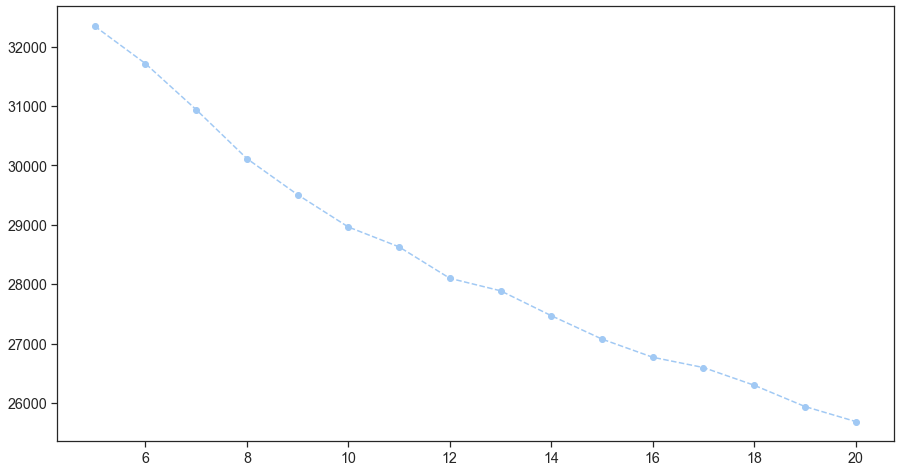

In [87]:
kmeans_inertia = []
r = range(20, 51)
for i in r:
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_train_oh_)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(r, kmeans_inertia, marker='o', linestyle='--')

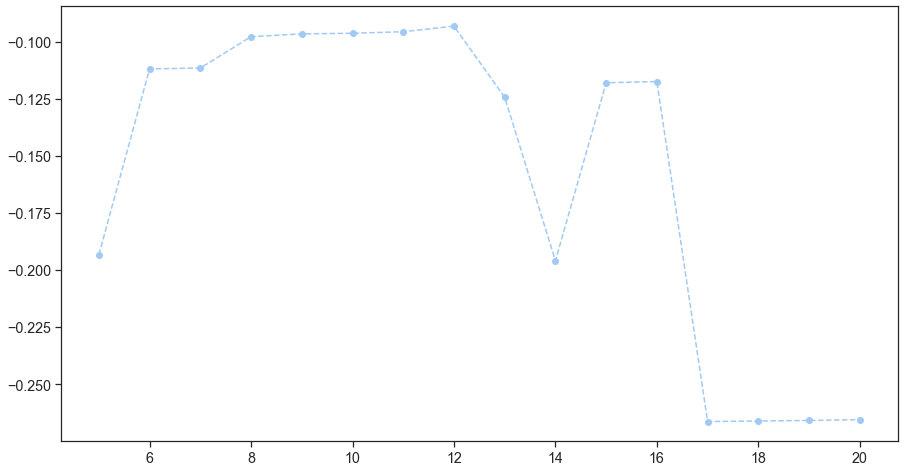

In [85]:
sil_score = []
r = range(5, 21)
for i in r:
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_train_oh_norm)
    sil_score.append(silhouette_score(df_train_oh_norm, kmeans.labels_, metric='euclidean'))
plt.figure(figsize=(15,8))
plt.plot(r, sil_score, marker='o', linestyle='--')

In [113]:
import category_encoders as ce

In [114]:
bi_enc = ce.BinaryEncoder(return_df=True)

In [126]:
bi_enc.fit(pd.concat([df_train_[df_test_.columns], df_test_]))

BinaryEncoder()

In [129]:
df_train_bi = bi_enc.transform(df_train_[df_test_.columns])

In [130]:
df_test_bi = bi_enc.transform(df_test_)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_train_bi,
                                                    df_train_['response'],
                                                    test_size=0.3, random_state=0)

params = {
          'criterion':['gini','entropy'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'max_features':list(range(1,20)),
          'max_depth':list(range(3,16)),
          'min_samples_leaf':list(range(1,16)),
          'min_samples_split':list(range(1,16))
         }

rand_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_distributions=params,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [135]:
rand_result.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 4,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [136]:
dtc = DecisionTreeClassifier(random_state=0, **rand_result.best_params_)

In [137]:
dtc = dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_test)
print('The precision is {}'.format(round(dtc.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered'])
cv_scores = cross_val_score(dtc, pd.DataFrame(df_train_oh_norm), df_train_oh['response'], cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.632
The f1 score is 0.157
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1870
           1       0.10      0.40      0.16       175

    accuracy                           0.63      2045
   macro avg       0.51      0.53      0.46      2045
weighted avg       0.85      0.63      0.71      2045

Mean score is 0.5005240697439077
Score STD is 0.4143072685182674


In [138]:
scaler_bi = StandardScaler()

In [139]:
scaler_bi.fit(df_train_bi)

StandardScaler()

In [143]:
df_train_bi_norm = scaler_bi.transform(df_train_bi)

In [144]:
df_train_bi_norm = pd.DataFrame(df_train_bi_norm, columns=df_train_bi.columns)
df_train_bi_norm.head()

,ID,IL1_0,IL1_1,IL1_2,IL1_3,IL1_4,IL1_5,IL1_6,IL2_0,IL2_1,...,day,hour,device_0,device_1,device_2,device_3,device_4,device_5,device_6,device_7
0,-0.582135,0.0,-0.095818,-0.268729,-0.594354,-0.689744,-1.189159,0.686041,0.0,-0.156537,...,0.144467,-0.952214,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,-1.069150,1.396044
1,-0.623713,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,-1.457640,0.0,-0.156537,...,0.144467,-1.876950,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,0.935322,-0.716310
2,0.653737,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,0.686041,0.0,-0.156537,...,-1.401932,0.666075,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,0.935322,1.396044
3,0.765274,0.0,-0.095818,-0.268729,-0.594354,1.449813,-1.189159,-1.457640,0.0,-0.156537,...,-0.886466,-0.952214,0.0,-0.043717,-0.306432,-0.752294,-1.134084,1.286008,-1.069150,-0.716310
4,-1.259326,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,0.686041,0.0,-0.156537,...,1.175399,-1.183398,0.0,-0.043717,-0.306432,-0.752294,-1.134084,1.286008,-1.069150,1.396044


In [149]:
X_train, X_test, y_train, y_test = train_test_split(df_train_bi_norm,
                                                    df_train_['response'],
                                                    test_size=0.3, random_state=0)

params = {
          'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'C':list(np.arange(0, 2.1, 0.1)),
          'tol':[1e-3, 1e-4, 1e-5],
          'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
          'max_iter':list(range(50, 200, 25)),
          'multi_class':['auto','ovr','multinomial']
         }

rand_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_distributions=params,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [150]:
rand_result.best_params_

{'tol': 1e-05,
 'solver': 'liblinear',
 'penalty': 'l1',
 'multi_class': 'auto',
 'max_iter': 175,
 'class_weight': 'balanced',
 'C': 1.7000000000000002}

In [151]:
lr = LogisticRegression(random_state=0, **rand_result.best_params_)

In [152]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print('The precision is {}'.format(round(lr.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
display(pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered']))
# cv_scores = cross_val_score(lr, df_train_oh_norm, df_train_oh['response'], cv=10)
# print('Mean score is {}'.format(np.mean(cv_scores)))
# print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.649
The f1 score is 0.186
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1870
           1       0.12      0.47      0.19       175

    accuracy                           0.65      2045
   macro avg       0.52      0.57      0.48      2045
weighted avg       0.86      0.65      0.73      2045



,Not Answered,Answered
Not Answered,82,93
Answered,625,1245


In [154]:
enc_cols = ['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','device','day','hour']

In [155]:
bi_enc_ = ce.BinaryEncoder(cols = enc_cols, return_df=True)

In [156]:
bi_enc_.fit(pd.concat([df_train_[df_test_.columns], df_test_]))

BinaryEncoder(cols=['IL1', 'IL2', 'IL3', 'IL4', 'CIL1', 'CIL2', 'CIL3', 'CLI4',
                    'device', 'day', 'hour'])

In [157]:
df_train_bi_ = bi_enc_.transform(df_train_[df_test_.columns])

In [158]:
df_test_bi_ = bi_enc_.transform(df_test_)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(df_train_bi_,
                                                    df_train_['response'],
                                                    test_size=0.3, random_state=0)

params = {
          'criterion':['gini','entropy'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'max_features':list(range(1,20)),
          'max_depth':list(range(3,16)),
          'min_samples_leaf':list(range(1,16)),
          'min_samples_split':list(range(1,16))
         }

rand_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_distributions=params,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [161]:
rand_result.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 4,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [163]:
dtc = DecisionTreeClassifier(random_state=0, **rand_result.best_params_)

In [164]:
dtc = dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_test)
print('The precision is {}'.format(round(dtc.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered'])
cv_scores = cross_val_score(dtc, pd.DataFrame(df_train_oh_norm), df_train_oh['response'], cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.625
The f1 score is 0.171
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1870
           1       0.11      0.45      0.17       175

    accuracy                           0.62      2045
   macro avg       0.52      0.55      0.46      2045
weighted avg       0.86      0.62      0.71      2045

Mean score is 0.5005240697439077
Score STD is 0.4143072685182674


In [165]:
scaler_bi_ = StandardScaler()

In [169]:
scaler_bi_.fit(df_train_bi_)

StandardScaler()

In [170]:
df_train_bi_norm_ = scaler_bi_.transform(df_train_bi_)

In [171]:
df_train_bi_norm_ = pd.DataFrame(df_train_bi_norm_, columns=df_train_bi_.columns)
df_train_bi_norm_.head()

,ID,IL1_0,IL1_1,IL1_2,IL1_3,IL1_4,IL1_5,IL1_6,IL2_0,IL2_1,...,hour_4,hour_5,device_0,device_1,device_2,device_3,device_4,device_5,device_6,device_7
0,-0.582135,0.0,-0.095818,-0.268729,-0.594354,-0.689744,-1.189159,0.686041,0.0,-0.156537,...,-0.904333,0.866100,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,-1.069150,1.396044
1,-0.623713,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,-1.457640,0.0,-0.156537,...,1.105787,-1.154602,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,0.935322,-0.716310
2,0.653737,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,0.686041,0.0,-0.156537,...,1.105787,0.866100,0.0,-0.043717,-0.306432,-0.752294,-1.134084,-0.777600,0.935322,1.396044
3,0.765274,0.0,-0.095818,-0.268729,-0.594354,1.449813,-1.189159,-1.457640,0.0,-0.156537,...,-0.904333,0.866100,0.0,-0.043717,-0.306432,-0.752294,-1.134084,1.286008,-1.069150,-0.716310
4,-1.259326,0.0,-0.095818,-0.268729,-0.594354,-0.689744,0.840931,0.686041,0.0,-0.156537,...,-0.904333,-1.154602,0.0,-0.043717,-0.306432,-0.752294,-1.134084,1.286008,-1.069150,1.396044


In [176]:
X_train, X_test, y_train, y_test = train_test_split(df_train_bi_norm_,
                                                    df_train_['response'],
                                                    test_size=0.3, random_state=0)

params = {
          'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced', {0:1, 1:3}, {0:1, 1:5}],
          'C':list(np.arange(0, 2.1, 0.1)),
          'tol':[1e-3, 1e-4, 1e-5],
          'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
          'max_iter':list(range(50, 200, 25)),
          'multi_class':['auto','ovr','multinomial']
         }

rand_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_distributions=params,
    cv = 10,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [177]:
rand_result.best_params_

{'tol': 0.001,
 'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 125,
 'class_weight': 'balanced',
 'C': 1.3}

In [178]:
lr = LogisticRegression(random_state=0, **rand_result.best_params_)

In [179]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print('The precision is {}'.format(round(lr.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_predict),3)))
print(classification_report(y_test,y_predict))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
display(pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered']))
# cv_scores = cross_val_score(lr, df_train_oh_norm, df_train_oh['response'], cv=10)
# print('Mean score is {}'.format(np.mean(cv_scores)))
# print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.641
The f1 score is 0.181
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1870
           1       0.11      0.46      0.18       175

    accuracy                           0.64      2045
   macro avg       0.52      0.56      0.48      2045
weighted avg       0.86      0.64      0.72      2045



,Not Answered,Answered
Not Answered,81,94
Answered,640,1230
